# Fake And Real News Detection With Logistic Regression

In [6]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report   
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pickle

In [7]:
# importing data

x_train_path = '../data/x_train.pkl'
x_test_path = '../data/x_test.pkl'
y_train_path = '../data/y_train.pkl'
y_test_path = '../data/y_test.pkl'

# Reading the pickle files
with open(x_train_path, 'rb') as file:
    x_train = pickle.load(file)

with open(x_test_path, 'rb') as file:
    x_test = pickle.load(file)

with open(y_train_path, 'rb') as file:
    y_train = pickle.load(file)

with open(y_test_path, 'rb') as file:
    y_test = pickle.load(file)



In [8]:
# Vectraizing the text data

vect = TfidfVectorizer(stop_words='english', max_df=0.7)
xv_train = vect.fit_transform(x_train)
xv_test = vect.transform(x_test)


In [10]:
model = LogisticRegression()
model.fit(xv_train, y_train)

LogisticRegression()

In [11]:
# Predicting the model
y_pred = model.predict(xv_test)
model.score(xv_test, y_test)


0.9858084135833756

Accuracy: 0.9858084135833756
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       969
           1       0.99      0.98      0.99      1004

    accuracy                           0.99      1973
   macro avg       0.99      0.99      0.99      1973
weighted avg       0.99      0.99      0.99      1973



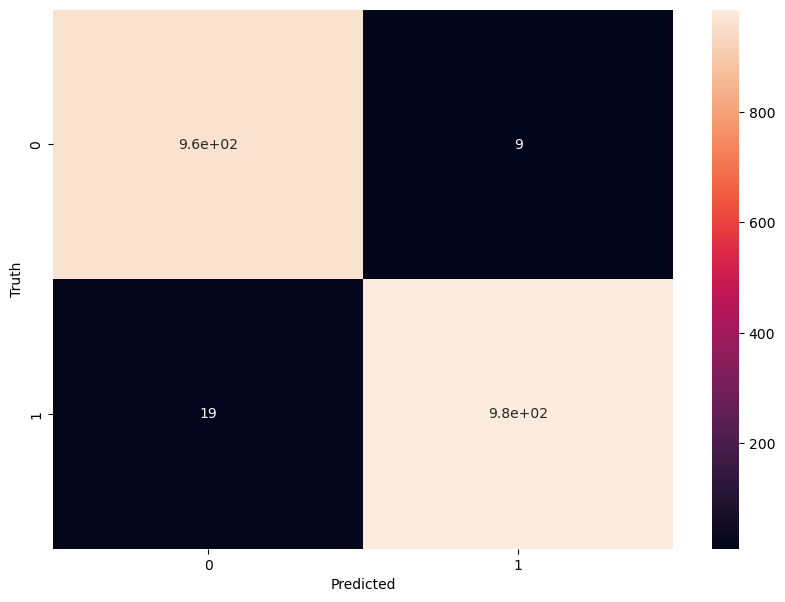

In [12]:
# make a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


# show to accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
